# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Packages and Modules</p>

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Loading</p>

In [2]:
data=pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Cleaning and Transformation</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data['date']=pd.to_datetime(data.date,format="%Y%m%dT%H%M%S")

In [5]:
def func1(a):
    return a.strftime('%Y')
def func2(a):
    return a.strftime('%m')
def func3(a):
    return a.strftime('%d')

In [6]:
data['Month']=data.date.apply(func2)
data['Year']=data.date.apply(func1)
data['date']=data.date.apply(func3)

In [7]:
data.duplicated().value_counts()

False    21613
Name: count, dtype: int64

In [8]:
table=data.corr()

In [9]:
def highcorr(data,target,thres):
    set1=set()
    for i in data.columns:
        if abs(data.loc[i,target])>thres:
            set1.add(i)
    return set1
            

In [10]:
list1=highcorr(table,'price',0.5)

In [11]:
list2=set()
for i in list1:
    ans=highcorr(table,i,0.5)
    list2.add(i)
    for j in ans:
        list2.add(j)

In [12]:

newtable=data[[i for i in list2]]

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Correlation Visualizations</p>

<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">HeatMap</p>
</div>


<Axes: >

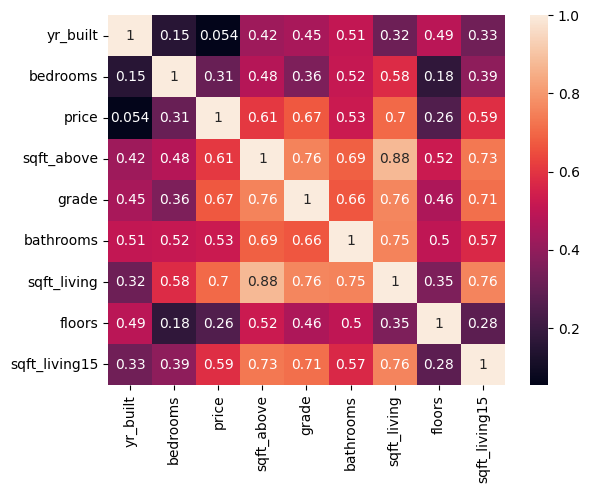

In [13]:
sb.heatmap(newtable.corr(),annot=True)

In [14]:
newtable.drop(['sqft_above','floors','grade'],axis=1,inplace=True)

<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">Scatter Plots</p>
</div>


<Figure size 2000x2000 with 0 Axes>

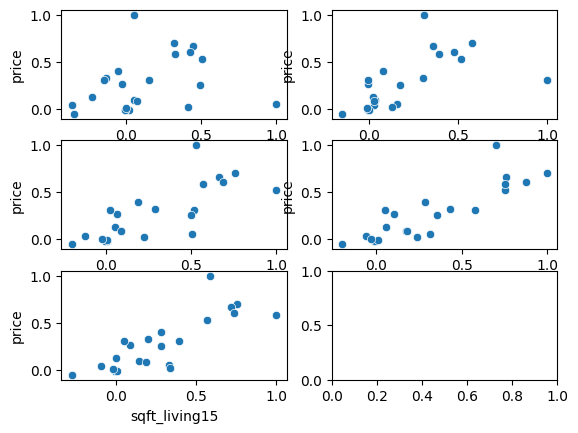

In [15]:
fig=plt.figure(figsize=(20,20))
fig,axis=plt.subplots(3,2)
val=newtable.columns
val=list(val)
val.remove('price')
count=0
for j in range(3):
    for k in range(2):
        sb.scatterplot(data=table,x=val[count],y='price',ax=axis[j][k])
        count+=1
        if count==5:
            break
    if count==5:
        break


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Machine Learning</p>

In [16]:
y=newtable.price
x=newtable.drop('price',axis=1)

In [17]:
std=('std',StandardScaler(),['sqft_living15','sqft_living','bathrooms'])
mini=('min',MinMaxScaler(),['sqft_living15','sqft_living','bathrooms'])
col1=ColumnTransformer([std,mini],remainder='passthrough')
col=('column',col1)

In [18]:
pi1=Pipeline(steps=[col,('model1',RandomForestRegressor())])
pi2=Pipeline(steps=[col,('model2',BaggingRegressor())])
pi3=Pipeline(steps=[col,('model3',GradientBoostingRegressor())])
pi4=Pipeline(steps=[col,('model4',AdaBoostRegressor())])
pi5=Pipeline(steps=[col,('model5',LinearRegression())])
pi6=Pipeline(steps=[col,('model6',KNeighborsRegressor())])
pi7=Pipeline(steps=[col,('model7',SVR())])
pi8=Pipeline(steps=[col,('model8',LGBMRegressor())])
pi9=Pipeline(steps=[col,('model9',CatBoostRegressor())])
pi10=Pipeline(steps=[col,('model10',XGBRegressor())])
pi11=Pipeline(steps=[col,('model11',DecisionTreeRegressor())])

In [19]:
names=['RandomForestRegressor',
'BaggingRegressor',
'GradientBoostingRegressor',
'AdaBoostRegressor',
'LinearRegression',
'KNeighborsRegressor',
'SVR',
'LGBMRegressor',
'CatBoostRegressor',
'XGBRegressor',
'DecisionTreeRegressor',]
pipeline1=[pi1,pi2,pi3,pi4,pi5,pi6,pi7,pi8,pi9,pi10,pi11]

In [20]:
xtra,xtest,ytra,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
for i in pipeline1:
    i.fit(xtra,ytra)


Learning rate set to 0.064232
0:	learn: 353795.3217340	total: 58.3ms	remaining: 58.2s
1:	learn: 343687.4484089	total: 61.5ms	remaining: 30.7s
2:	learn: 333859.2087517	total: 64.8ms	remaining: 21.5s
3:	learn: 324832.8743506	total: 67.8ms	remaining: 16.9s
4:	learn: 316493.1618483	total: 71.1ms	remaining: 14.2s
5:	learn: 309216.3282320	total: 74.1ms	remaining: 12.3s
6:	learn: 302479.5164485	total: 77.2ms	remaining: 10.9s
7:	learn: 295786.1924727	total: 80.4ms	remaining: 9.97s
8:	learn: 289810.7490059	total: 83.4ms	remaining: 9.18s
9:	learn: 284272.4675340	total: 86.5ms	remaining: 8.56s
10:	learn: 279328.6180137	total: 89.5ms	remaining: 8.04s
11:	learn: 274544.9924932	total: 92.7ms	remaining: 7.63s
12:	learn: 270177.6050574	total: 95.7ms	remaining: 7.27s
13:	learn: 266334.2705261	total: 99ms	remaining: 6.97s
14:	learn: 262769.4252577	total: 102ms	remaining: 6.69s
15:	learn: 260031.8361529	total: 105ms	remaining: 6.45s
16:	learn: 257067.1155441	total: 108ms	remaining: 6.26s
17:	learn: 25426

In [22]:
c1=cross_val_score(pi1,x,y,cv=5,verbose=2,scoring='r2')
c2=cross_val_score(pi2,x,y,cv=5,verbose=2,scoring='r2')
c3=cross_val_score(pi3,x,y,cv=5,verbose=2,scoring='r2')
c4=cross_val_score(pi4,x,y,cv=5,verbose=2,scoring='r2')
c5=cross_val_score(pi5,x,y,cv=5,verbose=2,scoring='r2')
c6=cross_val_score(pi6,x,y,cv=5,verbose=2,scoring='r2')
c7=cross_val_score(pi7,x,y,cv=5,verbose=2,scoring='r2')
c8=cross_val_score(pi8,x,y,cv=5,verbose=2,scoring='r2')
c9=cross_val_score(pi9,x,y,cv=5,verbose=2,scoring='r2')
c10=cross_val_score(pi10,x,y,cv=5,verbose=2,scoring='r2')
c11=cross_val_score(pi11,x,y,cv=5,verbose=2,scoring='r2')

[CV] END .................................................... total time=   8.4s
[CV] END .................................................... total time=   8.4s
[CV] END .................................................... total time=   8.3s
[CV] END .................................................... total time=   8.4s
[CV] END .................................................... total time=   8.2s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   0.8s
[CV] END .................................................... total time=   2.1s
[CV] END .................................................... total time=   2.1s
[CV] END ...................

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Results</p>

In [23]:
list3=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11]
print('Cross_Val_Scores')
for i in range(len(pipeline1)):
  print(names[i],":",list3[i],'Mean :',"{:.2f}".format(list3[i].mean()))

Cross_Val_Scores
RandomForestRegressor : [0.6348356  0.67323816 0.62746844 0.62605359 0.54517784] Mean : 0.62
BaggingRegressor : [0.61437755 0.63847362 0.60074746 0.60247503 0.48639494] Mean : 0.59
GradientBoostingRegressor : [0.66548208 0.67592559 0.64917457 0.644994   0.58665723] Mean : 0.64
AdaBoostRegressor : [0.50262024 0.49592136 0.35396178 0.32087266 0.04003093] Mean : 0.34
LinearRegression : [0.5673392  0.57029144 0.56456215 0.57013635 0.49608121] Mean : 0.55
KNeighborsRegressor : [0.57391723 0.56452012 0.59460775 0.5911738  0.53805397] Mean : 0.57
SVR : [-0.05192574 -0.04528088 -0.04735662 -0.06129148 -0.1056912 ] Mean : -0.06
LGBMRegressor : [0.63694501 0.66070664 0.62425325 0.64226091 0.56440465] Mean : 0.63
CatBoostRegressor : [0.6321048  0.63109307 0.63864141 0.62886239 0.51972312] Mean : 0.61
XGBRegressor : [0.58724405 0.60502685 0.62127554 0.60634984 0.51782811] Mean : 0.59
DecisionTreeRegressor : [0.36813156 0.35742492 0.24814581 0.29639449 0.11887818] Mean : 0.28


In [24]:
model1=RandomizedSearchCV(pi1,{
    'model1__n_estimators': [50, 100, 200],
    'model1__max_depth': [None, 10, 20, 30],
    'model1__min_samples_split': [2, 5, 10],
    'model1__min_samples_leaf': [1, 2, 4],
    'model1__max_features': ['auto', 'sqrt', 'log2', None]
},scoring='r2',cv=5
)
model2=RandomizedSearchCV(pi2,{
    'model2__n_estimators': [10, 50, 100],
    'model2__max_samples': [0.5, 0.7, 1.0],
    'model2__max_features': [0.5, 0.7, 1.0]
}
,scoring='r2',cv=5
)
model3=RandomizedSearchCV(pi3,{
    'model3__n_estimators': [50, 100, 200],
    'model3__learning_rate': [0.01, 0.1, 0.2],
    'model3__max_depth': [3, 5, 7],
    'model3__subsample': [0.8, 1.0],
    'model3__min_samples_split': [2, 5, 10],
    'model3__min_samples_leaf': [1, 2, 4]
}

,scoring='r2',cv=5
)
model4=RandomizedSearchCV(pi5,
    {
    'model5__fit_intercept': [True, False],
    'model5__positive': [True, False],
    'model5__copy_X': [True, False],
    'model5__n_jobs': [None, 1, 2, 4]  # Adjust the number of jobs based on your system capabilities
}

,scoring='r2',cv=5
)
model5=RandomizedSearchCV(pi6,{
    'column__std__with_mean': [True, False],
    'column__std__with_std': [True, False],
    'column__min__feature_range': [(0, 1), (0, 0.5)],
    'model6__n_neighbors': [3, 5, 7, 10],
    'model6__weights': ['uniform', 'distance'],
    'model6__p': [1, 2]
}

,scoring='r2',cv=5
)

model6=RandomizedSearchCV(pi8,{
    'model8__num_leaves': [31, 50, 100],
    'model8__learning_rate': [0.01, 0.1, 0.2],
    'model8__n_estimators': [50, 100, 200],
    'model8__subsample': [0.8, 1.0],
    'model8__colsample_bytree': [0.8, 1.0]
}
,scoring='r2',cv=5
)
model7=RandomizedSearchCV(pi9,{
    'model9__iterations': [50, 100, 200],
    'model9__learning_rate': [0.01, 0.1, 0.2],
    'model9__depth': [3, 5, 7],
    'model9__subsample': [0.8, 1.0]
}

,scoring='r2',cv=5
)
model8=RandomizedSearchCV(pi10,{
    'model10__n_estimators': [50, 100, 200],
    'model10__learning_rate': [0.01, 0.1, 0.2],
    'model10__max_depth': [3, 5, 7],
    'model10__subsample': [0.8, 1.0],
    'model10__colsample_bytree': [0.8, 1.0],
    'model10__gamma': [0, 1, 5],
    'model10__reg_alpha': [0, 0.1, 0.5],
    'model10__reg_lambda': [1, 2, 5],
}

,scoring='r2',cv=5
)

In [25]:
models=[model1,model2,model3,model4,model5,model6,model7,model8]

In [26]:
model1.fit(xtra,ytra)
model2.fit(xtra,ytra)
model3.fit(xtra,ytra)
model4.fit(xtra,ytra)
model5.fit(xtra,ytra)
model6.fit(xtra,ytra)
model7.fit(xtra,ytra)
model8.fit(xtra,ytra)

0:	learn: 328746.8477543	total: 5.04ms	remaining: 247ms
1:	learn: 302889.6333791	total: 9.32ms	remaining: 224ms
2:	learn: 282322.3222898	total: 13ms	remaining: 203ms
3:	learn: 268558.6956555	total: 16.7ms	remaining: 192ms
4:	learn: 257006.0464110	total: 20.1ms	remaining: 181ms
5:	learn: 248223.7334787	total: 23.5ms	remaining: 172ms
6:	learn: 241849.0643899	total: 27.2ms	remaining: 167ms
7:	learn: 236392.2861870	total: 30.7ms	remaining: 161ms
8:	learn: 232241.1237257	total: 34ms	remaining: 155ms
9:	learn: 228834.6976815	total: 37.4ms	remaining: 150ms
10:	learn: 226433.9834293	total: 40.8ms	remaining: 145ms
11:	learn: 224013.5477368	total: 44.3ms	remaining: 140ms
12:	learn: 221548.5360074	total: 47.7ms	remaining: 136ms
13:	learn: 219829.0842066	total: 51.2ms	remaining: 132ms
14:	learn: 218482.9199888	total: 54.6ms	remaining: 127ms
15:	learn: 217312.9989958	total: 58.4ms	remaining: 124ms
16:	learn: 217079.0048941	total: 60ms	remaining: 117ms
17:	learn: 215788.7870323	total: 63.4ms	remaini

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms']),
                                                                              ('min',
                                                                               MinMaxScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms'])])),
                                             ('model10',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           cols...
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))]),
                   param_distributions={'model10__colsample_bytree': [0.8, 1.0],
                                        'model10__gamma': [0, 1, 5],
                                        'model10__learning_rate': [0.01, 0.1,
                                                                   0.2],
                                        'model10__max_depth': [3, 5, 7],
                                        'model10__n_estimators': [50, 100, 200],
                                        'model10__reg_alpha': [0, 0.1, 0.5],
                                        'model10__reg_lambda': [1, 2, 5],
                                        'model10__subsample': [0.8, 1.0]},
                   scoring='r2')

In [27]:
c1=cross_val_score(model1,x,y,cv=5,verbose=2,scoring='r2')
c2=cross_val_score(model2,x,y,cv=5,verbose=2,scoring='r2')
c3=cross_val_score(model3,x,y,cv=5,verbose=2,scoring='r2')
c4=cross_val_score(model4,x,y,cv=5,verbose=2,scoring='r2')
c5=cross_val_score(model5,x,y,cv=5,verbose=2,scoring='r2')
c6=cross_val_score(model6,x,y,cv=5,verbose=2,scoring='r2')
c7=cross_val_score(model7,x,y,cv=5,verbose=2,scoring='r2')
c8=cross_val_score(model8,x,y,cv=5,verbose=2,scoring='r2')

[CV] END .................................................... total time= 1.7min
[CV] END .................................................... total time= 3.1min
[CV] END .................................................... total time= 2.8min
[CV] END .................................................... total time= 3.9min
[CV] END .................................................... total time= 4.3min
[CV] END .................................................... total time= 1.8min
[CV] END .................................................... total time= 2.3min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 2.0min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 3.3min
[CV] END .................................................... total time= 2.8min
[CV] END ...................

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Results After HyperParameter Tuning</p>

In [28]:
list3=[c1,c2,c3,c4,c5,c6,c7,c8]
names=['Random Forest', 'Bagging', 'Gradient Boosting', 'Linear Regression', 'KNeighbors', 'LightGBM','CatBoost','XGBRegressor']
print('Cross_Val_Scores After hypertuning')
for i in range(8):
  print(names[i],":",list3[i],'Mean :',"{:.2f}".format(list3[i].mean()))

Cross_Val_Scores After hypertuning
Random Forest : [0.64200595 0.66702333 0.64383716 0.63891595 0.5933706 ] Mean : 0.64
Bagging : [0.64219217 0.66965964 0.6323028  0.63638361 0.54290837] Mean : 0.62
Gradient Boosting : [0.6593364  0.6890227  0.63808902 0.6288627  0.55663236] Mean : 0.63
Linear Regression : [0.5673392  0.57029144 0.56456215 0.57013635 0.49608121] Mean : 0.55
KNeighbors : [0.5698542  0.56518506 0.60525563 0.59191285 0.55087915] Mean : 0.58
LightGBM : [0.6337832  0.66070664 0.63118433 0.64741076 0.56930317] Mean : 0.63
CatBoost : [0.63468909 0.64567708 0.63300497 0.64369262 0.5443478 ] Mean : 0.62
XGBRegressor : [0.62099816 0.66501509 0.62278445 0.64013604 0.54630082] Mean : 0.62


<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Thank u for visiting</p>
